In [2]:
import sys
import os

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))


In [3]:
from load_data import load_data

# Define your SQL query
query = "SELECT * FROM public.xdr_data"  # Replace with your actual table name

# Load data into a DataFrame
df = load_data(query)

# Display the first few rows of the DataFrame
df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## 1. User Overview Analysis

In [4]:
import pandas as pd
# Convert Start and End to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Convert numeric identifiers to strings to avoid unintended mathematical operations
df['IMSI'] = df['IMSI'].astype(str)
df['MSISDN/Number'] = df['MSISDN/Number'].astype(str)
df['IMEI'] = df['IMEI'].astype(str)
df['Bearer Id'] = df['Bearer Id'].astype(str)


In [5]:
import numpy as np
# Fill numeric columns with the mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical fields with a placeholder
df['Last Location Name'] = df['Last Location Name'].fillna('Unknown')
df['Handset Manufacturer'] = df['Handset Manufacturer'].fillna('Unknown')
df['Handset Type'] = df['Handset Type'].fillna('Unknown')


In [6]:
df = df.drop_duplicates()
# Example: Clipping outliers in specific columns
df['Dur. (ms)'] = np.clip(df['Dur. (ms)'], 0, df['Dur. (ms)'].quantile(0.99))
df['Avg RTT DL (ms)'] = np.clip(df['Avg RTT DL (ms)'], 0, df['Avg RTT DL (ms)'].quantile(0.99))
# Add similar operations for other relevant columns
# Feature Engineering: Total Data Volume
df['Total Data Volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Feature Engineering: Session Duration in seconds
df['Session Duration (s)'] = df['Dur. (ms)'] / 1000


C:\Users\user\AppData\Local\Temp\ipykernel_14472\3213790934.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")


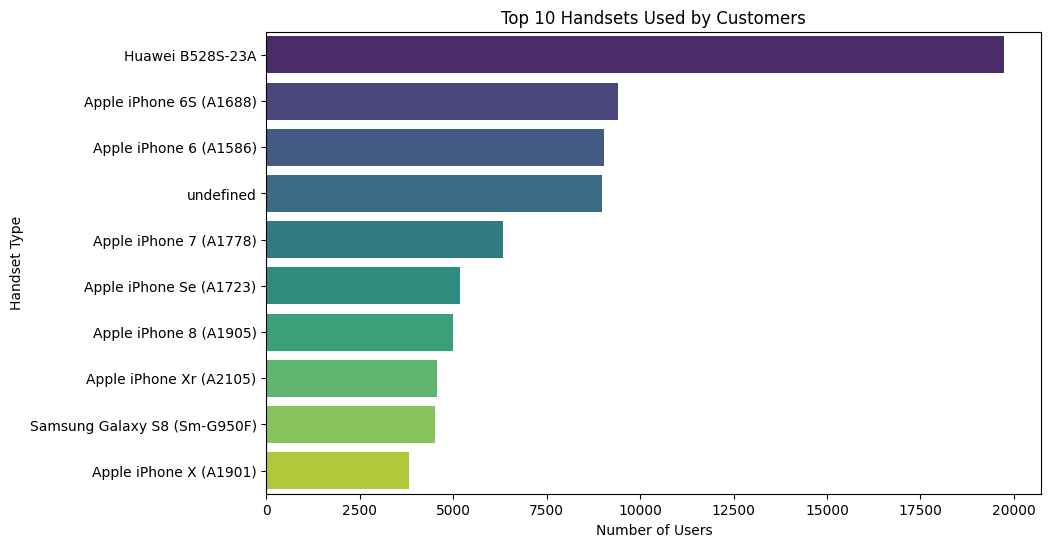

C:\Users\user\AppData\Local\Temp\ipykernel_14472\3213790934.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="magma")


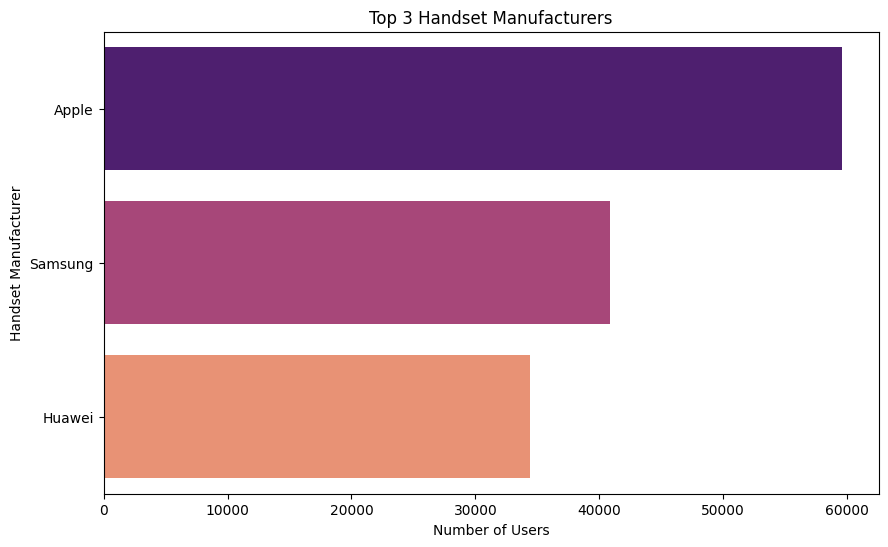

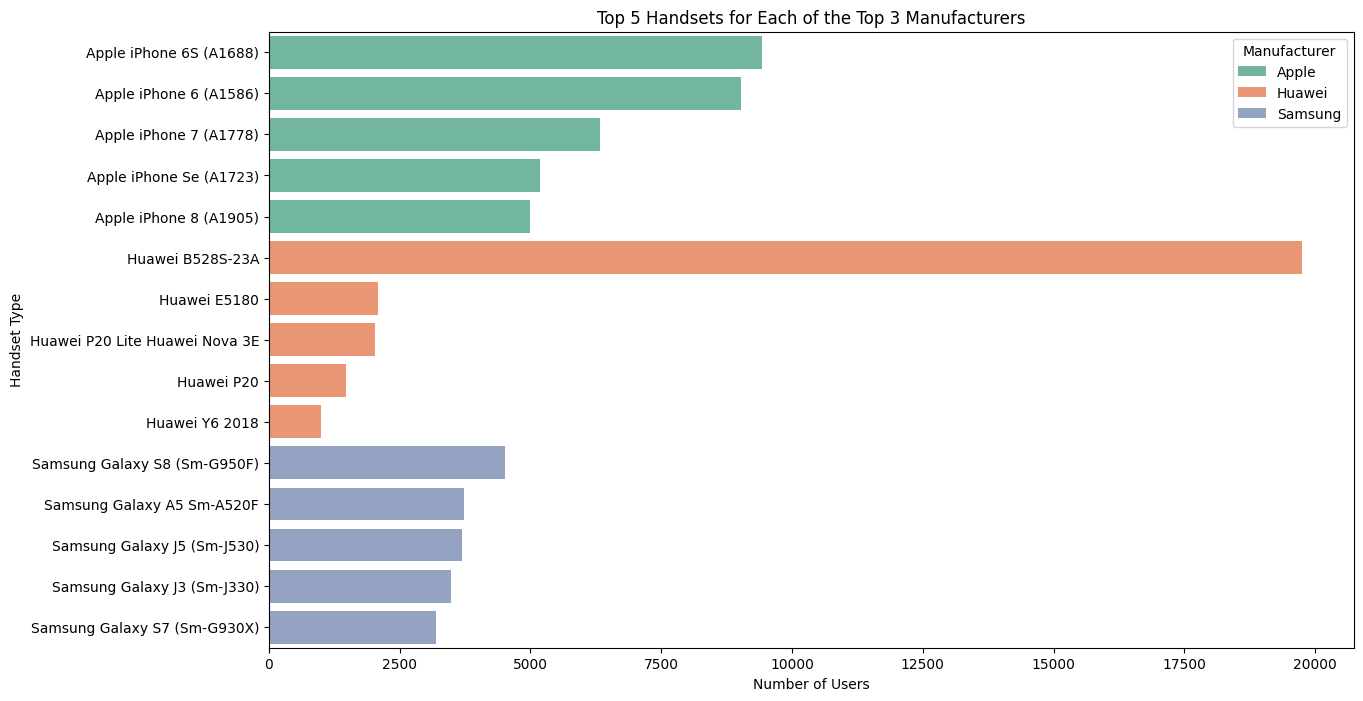

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 handsets used by customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette="viridis")
plt.title("Top 10 Handsets Used by Customers")
plt.xlabel("Number of Users")
plt.ylabel("Handset Type")
plt.show()

# Top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette="magma")
plt.title("Top 3 Handset Manufacturers")
plt.xlabel("Number of Users")
plt.ylabel("Handset Manufacturer")
plt.show()

# Top 5 handsets for each of the top 3 manufacturers
top_manufacturer_handsets = df[df['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_manufacturer_handsets.groupby(['Handset Manufacturer', 'Handset Type']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='Handset Type', hue='Handset Manufacturer', data=top_5_handsets_per_manufacturer, palette="Set2")
plt.title("Top 5 Handsets for Each of the Top 3 Manufacturers")
plt.xlabel("Number of Users")
plt.ylabel("Handset Type")
plt.legend(title="Manufacturer")
plt.show()


## 2.user engagement analysis


C:\Users\user\AppData\Local\Temp\ipykernel_14472\961178063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Data Volume (Bytes)', y='MSISDN/Number', data=top_10_users, palette="coolwarm")


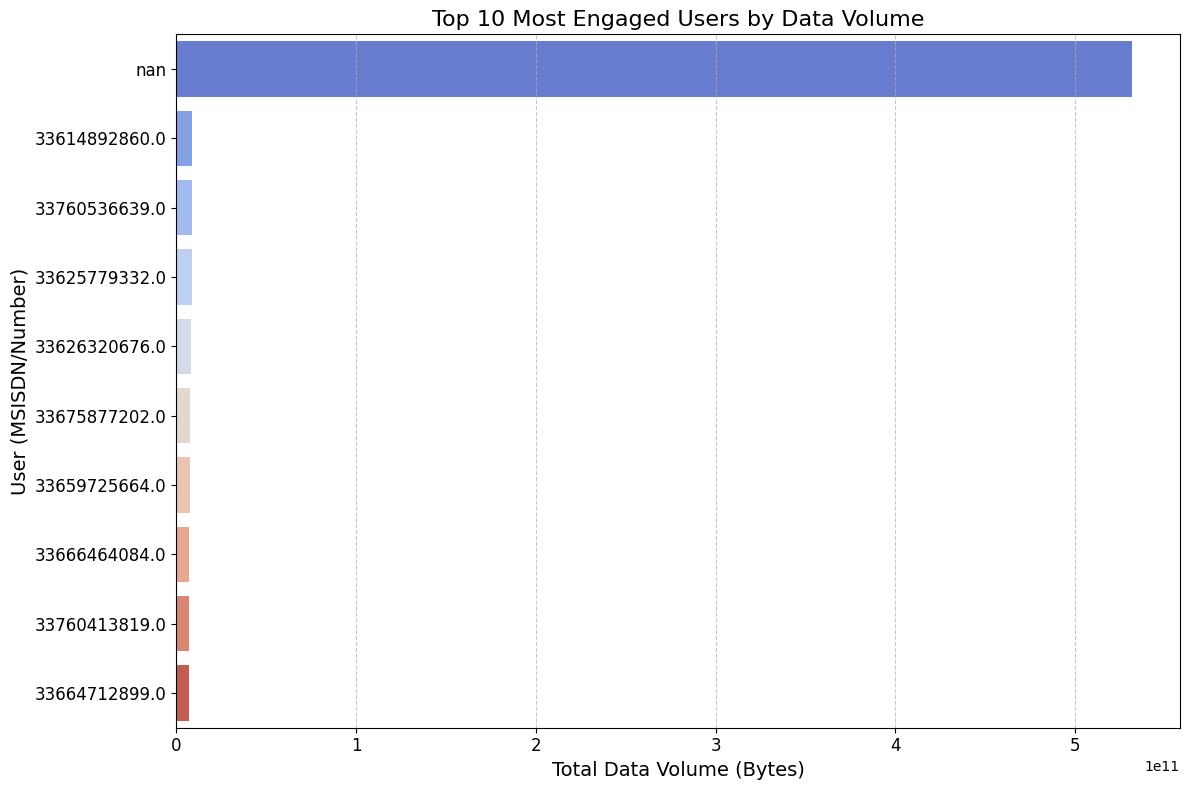

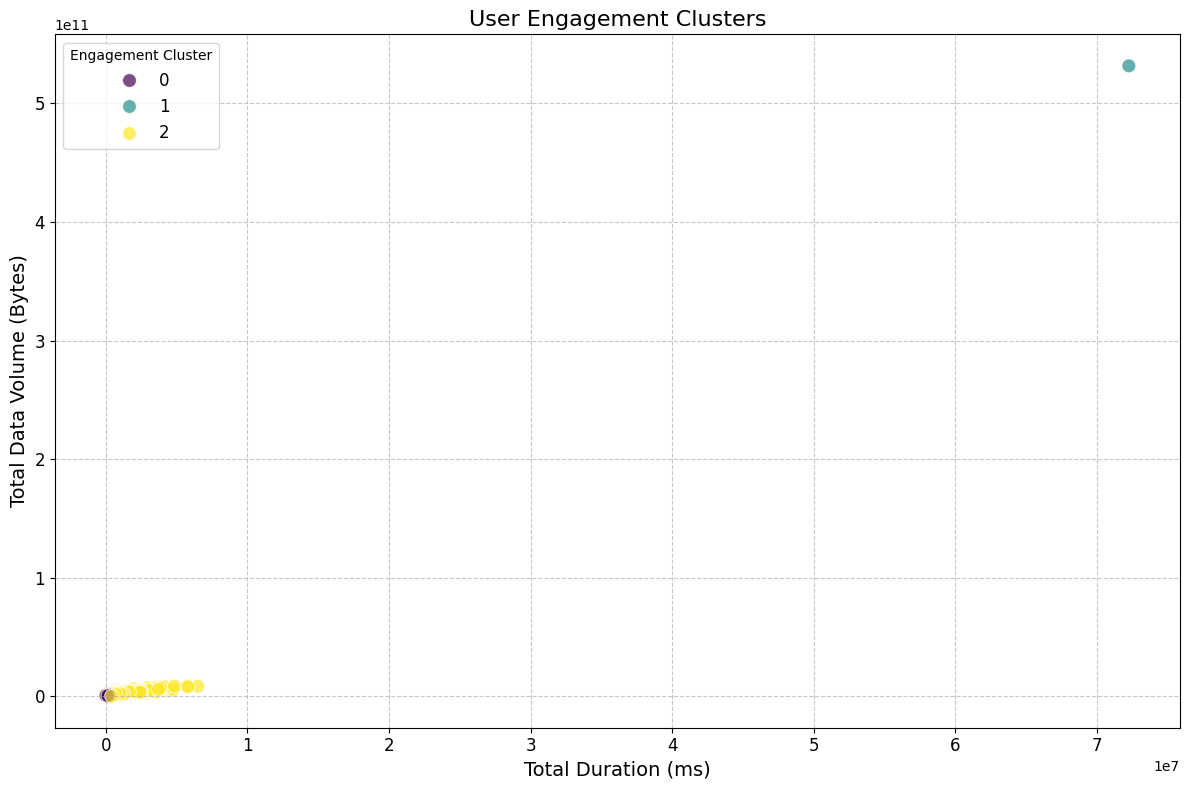

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Aggregate user metrics
user_engagement = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total Data Volume (Bytes)': 'sum',
    'Bearer Id': 'count'  # Number of sessions
}).reset_index()

# Rename columns for clarity
user_engagement.columns = ['MSISDN/Number', 'Total Duration (ms)', 'Total Data Volume (Bytes)', 'Number of Sessions']

# Top 10 most engaged users by Total Data Volume
top_10_users = user_engagement.nlargest(10, 'Total Data Volume (Bytes)')

# Plot for Top 10 most engaged users
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Data Volume (Bytes)', y='MSISDN/Number', data=top_10_users, palette="coolwarm")
plt.title("Top 10 Most Engaged Users by Data Volume", fontsize=16)
plt.xlabel("Total Data Volume (Bytes)", fontsize=14)
plt.ylabel("User (MSISDN/Number)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Normalize engagement metrics
scaler = StandardScaler()
user_engagement_normalized = scaler.fit_transform(user_engagement[['Total Duration (ms)', 'Total Data Volume (Bytes)', 'Number of Sessions']])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Engagement Cluster'] = kmeans.fit_predict(user_engagement_normalized)

# Plot for User Engagement Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Duration (ms)', y='Total Data Volume (Bytes)', hue='Engagement Cluster', data=user_engagement, palette="viridis", s=100, alpha=0.7)
plt.title("User Engagement Clusters", fontsize=16)
plt.xlabel("Total Duration (ms)", fontsize=14)
plt.ylabel("Total Data Volume (Bytes)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Engagement Cluster", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
# Display summary statistics for numeric columns in the DataFrame
df.describe()


,Start,Start ms,End,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes),Session Duration (s)
count,150000,150001.000000,150000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500010e+05,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000
mean,2019-04-26 12:36:09.616800256,499.188200,2019-04-27 17:39:38.703200256,498.800880,102891.726046,88.668034,17.662883,13300.045927,1770.428647,2.080991e+07,...,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,4.957646e+08,102.891726
min,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7142.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,...,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,2.895611e+07,7.142000
25%,2019-04-25 00:26:00,250.000000,2019-04-26 07:30:00,251.000000,57442.000000,35.000000,3.000000,43.000000,47.000000,1.332932e+06,...,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,2.844764e+08,57.442000
50%,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,86399.000000,54.000000,7.000000,63.000000,63.000000,2.080991e+07,...,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,4.968610e+08,86.399000
75%,2019-04-27 18:18:15,749.000000,2019-04-29 07:15:00,750.000000,132430.000000,109.795706,17.662883,19710.000000,1120.000000,2.080991e+07,...,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,7.065054e+08,132.430000
max,2019-04-29 07:28:00,999.000000,2019-04-30 23:59:00,999.000000,398786.000000,1010.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,...,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,9.559848e+08,398.786000
std,NaN,288.610872,NaN,288.096693,69487.693347,127.620378,76.529933,23971.798635,4625.340082,1.172356e+08,...,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,2.443810e+08,69.487693
